In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
import io
from scipy import misc
from sklearn.metrics import accuracy_score

#import datasets

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
train, test = train_test_split(data, test_size = 0.15)

In [5]:
print("Train set size: {}, Test set size: {}".format(len(train),len(test)))

Train set size: 1714, Test set size: 303


In [6]:
pos_temp = data[data['target'] == 1]['tempo']
neg_temp = data[data['target'] == 0]['tempo']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechness = data[data['target'] == 1]['speechiness']
neg_speechness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

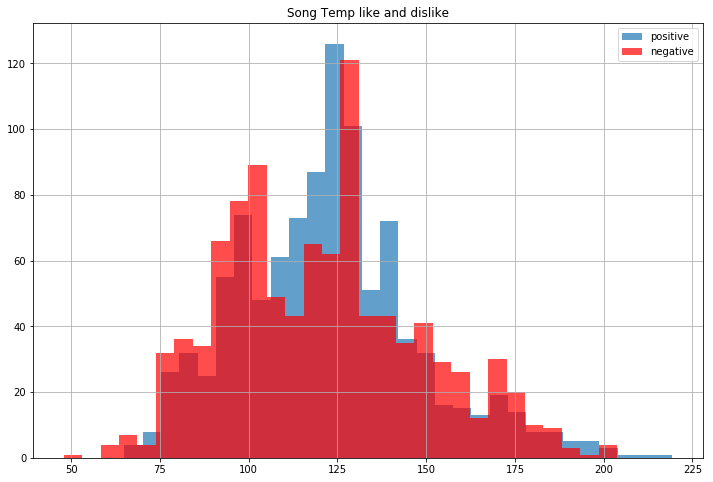

In [7]:
plt.figure(figsize=(12, 8))
plt.title("Song Temp like and dislike")
pos_temp.hist(alpha= 0.7, bins = 30, label ='positive')
neg_temp.hist(alpha= 0.7, bins = 30, label ='negative',color='red')
plt.legend(loc='upper right')
plt.show()

/home/harpreet/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


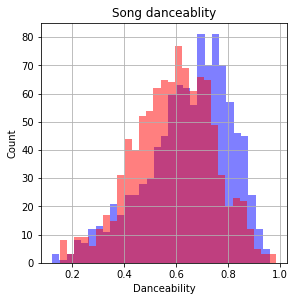

/home/harpreet/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


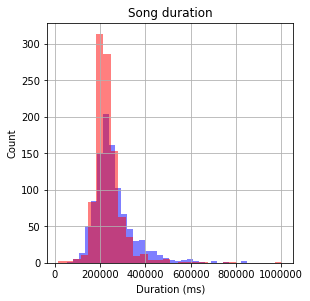

/home/harpreet/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


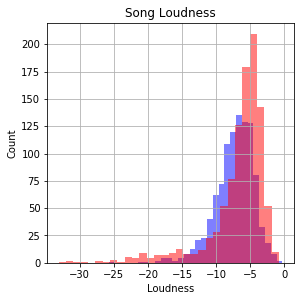

/home/harpreet/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


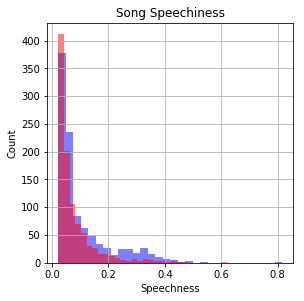

/home/harpreet/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


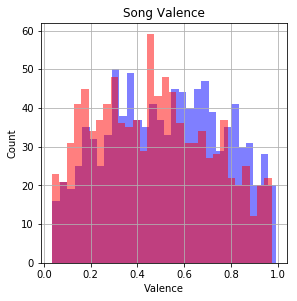

/home/harpreet/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


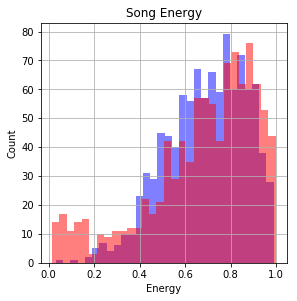

/home/harpreet/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


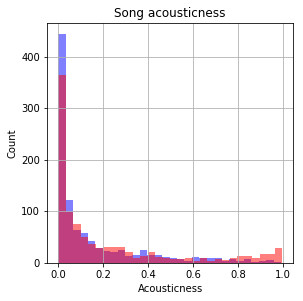

/home/harpreet/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


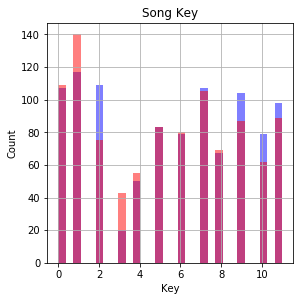

/home/harpreet/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


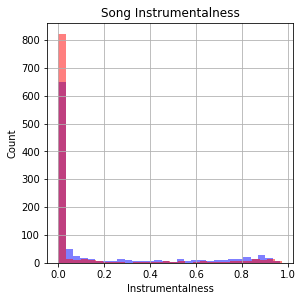

In [8]:
#dance
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.title('Song danceablity')
pos_dance.hist(alpha=0.5, bins=30, color='blue')
plt.subplot(3,3,1)
neg_dance.hist(alpha=0.5, bins=30, color='red')
plt.show()
#duration
plt.figure(figsize=(15,15))
plt.subplot(3,3,2)
plt.xlabel('Duration (ms)')
plt.ylabel('Count')
plt.title('Song duration')
pos_duration.hist(alpha=0.5, bins=30, color='blue')
plt.subplot(3,3,2)
neg_duration.hist(alpha=0.5, bins=30, color='red')
plt.show()
#loudness
plt.figure(figsize=(15,15))
plt.subplot(3,3,3)
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.title('Song Loudness')
pos_loudness.hist(alpha=0.5, bins=30, color='blue')
plt.subplot(3,3,3)
neg_loudness.hist(alpha=0.5, bins=30, color='red')
plt.show()
#speechness
plt.figure(figsize=(15,15))
plt.subplot(3,3,4)
plt.xlabel('Speechness')
plt.ylabel('Count')
plt.title('Song Speechiness')
pos_speechness.hist(alpha=0.5, bins=30, color='blue')
plt.subplot(3,3,4)
neg_speechness.hist(alpha=0.5, bins=30, color='red')
plt.show()
#valence
plt.figure(figsize=(15,15))
plt.subplot(3,3,5)
plt.xlabel('Valence')
plt.ylabel('Count')
plt.title('Song Valence')
pos_valence.hist(alpha=0.5, bins=30, color='blue')
plt.subplot(3,3,5)
neg_valence.hist(alpha=0.5, bins=30, color='red')
plt.show()
#energy
plt.figure(figsize=(15,15))
plt.subplot(3,3,6)
plt.xlabel('Energy')
plt.ylabel('Count')
plt.title('Song Energy')
pos_energy.hist(alpha=0.5, bins=30, color='blue')
plt.subplot(3,3,6)
neg_energy.hist(alpha=0.5, bins=30, color='red')
plt.show()
#acousticness
plt.figure(figsize=(15,15))
plt.subplot(3,3,7)
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.title('Song acousticness')
pos_acousticness.hist(alpha=0.5, bins=30, color='blue')
plt.subplot(3,3,7)
neg_acousticness.hist(alpha=0.5, bins=30, color='red')
plt.show()
#key
plt.figure(figsize=(15,15))
plt.subplot(3,3,8)
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Song Key')
pos_key.hist(alpha=0.5, bins=30, color='blue')
plt.subplot(3,3,8)
neg_key.hist(alpha=0.5, bins=30, color='red')
plt.show()
#instrumentalness
plt.figure(figsize=(15,15))
plt.subplot(3,3,9)
plt.xlabel('Instrumentalness')
plt.ylabel('Count')
plt.title('Song Instrumentalness')
pos_instrumentalness.hist(alpha=0.5, bins=30, color='blue')
plt.subplot(3,3,9)
neg_instrumentalness.hist(alpha=0.5, bins=30, color='red')
plt.show()

In [9]:
#Goal of the tree is to ultimately split observations into groups of homogenous target values

In [10]:
dt = DecisionTreeClassifier(min_samples_split=100)

In [11]:
features = ['danceability','loudness','valence','energy','instrumentalness','acousticness','key','speechiness','duration_ms']

In [12]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [13]:
dt_fit = dt.fit(X_train,y_train)

In [14]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.imshow(img)

/home/harpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


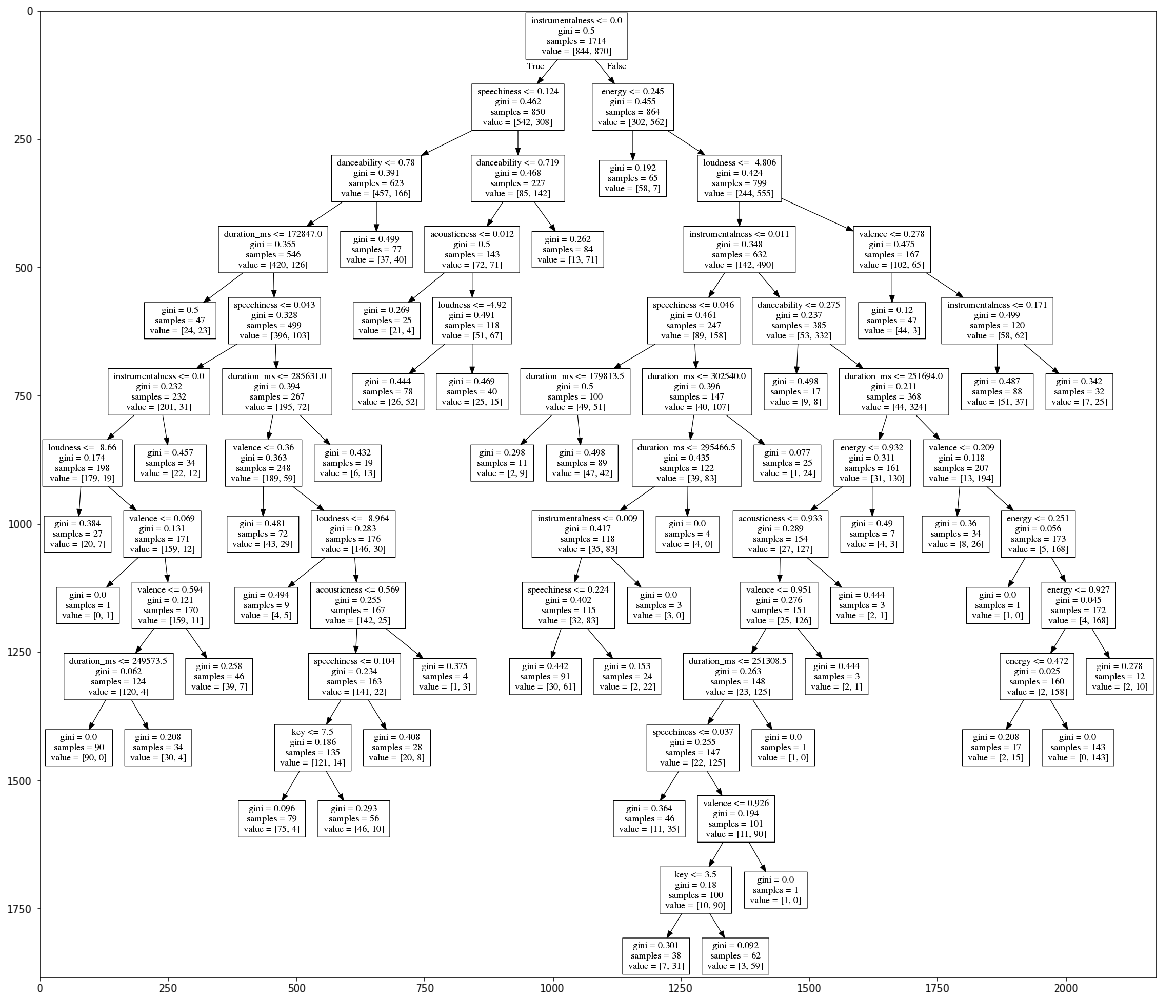

In [15]:
show_tree(dt_fit, features, 'decision_tree.png')

In [16]:
y_pred = dt.predict(X_test)

In [17]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [18]:
score = accuracy_score(y_test,y_pred) * 100

In [19]:
print("accuracy using decision tree {} %".format(score))

accuracy using decision tree 74.91749174917491 %
